In [1]:
import pandas as pd
import numpy as np
import jellyfish
import Levenshtein
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

In [2]:
col = ['id', 'nationality', 'gender', 'age', 'dob', 'title',
       'first_name', 'last_name', 'state', 'city', 'zip',
       'street_number', 'address_1', 'address_2', 'phone']
df = pd.read_csv('FEBRL_sample_data.csv', encoding = 'latin1', names = col, header=0)
df.head()

,id,nationality,gender,age,dob,title,first_name,last_name,state,city,zip,street_number,address_1,address_2,phone
0,rec-0-dup-0,NaN,f,28,19901218,,caitlin,chappel,,pres,4504,NaN,g'lbbes street,,087631 3909
1,rec-0-dup-1,NaN,f,2,19901218,,cait in,chap pl,,preston,4504,NaN,gibbess reet,,087631 909
2,rec-0-org,NaN,f,28,19901218,,caitlin,chappel,,preston,4504,NaN,gibbes street,,08 76313909
3,rec-1-org,ind,f,,19630324,,oscar,murjani,vic,bright,2060,14,aspinall street,,618 53569883
4,rec-10-dup-0,usa,f,27,19910221,,emiiy,,q d,pelican aters,3029,196,gavin pIace,,07 61244042


In [3]:
df[['prefix','trueRecordID', 'OrgDup', 'seqNum']] = df.id.str.split('-', expand=True)
df.drop('prefix', axis=1, inplace=True)
df.fillna ('', inplace=True)
df['stringConcat'] = df.title+df.first_name+df.last_name+df.city+df.state+df.zip+df.address_1+df.address_2+df.phone
df['last_name_met'] = df['last_name'].str.replace(' ', '').apply(lambda x: jellyfish.metaphone(x))
df['first_name_met'] = df['first_name'].str.replace(' ', '').apply(lambda x: jellyfish.metaphone(x))
df['city_met'] = df['city'].str.replace(' ', '').apply(lambda x: jellyfish.metaphone(x))
df['phone'] = df['phone'].str.replace(' ', '')
df['predicateLastName'] = df['last_name'].str[:2]
df['predicateFirstName'] = df['first_name'].str[:2]


dfDup = df[df.OrgDup == 'dup']
dfOrg = df[df.OrgDup == 'org']
dfDup.columns = [str(col) + '_match' for col in dfDup.columns]
dfOrg.columns = [str(col) + '_org' for col in dfOrg.columns]
print('Original Recordset:', dfOrg.shape)
print('Recordset of matches:', dfDup.shape)

Original Recordset: (30000, 24)
Recordset of matches: (15000, 24)


In [4]:
df.head().transpose()

,0,1,2,3,4
id,rec-0-dup-0,rec-0-dup-1,rec-0-org,rec-1-org,rec-10-dup-0
nationality,,,,ind,usa
gender,f,f,f,f,f
age,28,2,28,,27
dob,19901218,19901218,19901218,19630324,19910221
title,,,,,
first_name,caitlin,cait in,caitlin,oscar,emiiy
last_name,chappel,chap pl,chappel,murjani,
state,,,,vic,q d
city,pres,preston,preston,bright,pelican aters


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 24 columns):
id                    45000 non-null object
nationality           45000 non-null object
gender                45000 non-null object
age                   45000 non-null object
dob                   45000 non-null object
title                 45000 non-null object
first_name            45000 non-null object
last_name             45000 non-null object
state                 45000 non-null object
city                  45000 non-null object
zip                   45000 non-null object
street_number         45000 non-null object
address_1             45000 non-null object
address_2             45000 non-null object
phone                 45000 non-null object
trueRecordID          45000 non-null object
OrgDup                45000 non-null object
seqNum                45000 non-null object
stringConcat          45000 non-null object
last_name_met         45000 non-null object
first_name_

In [6]:
df.OrgDup.value_counts()

org    30000
dup    15000
Name: OrgDup, dtype: int64

In [7]:
df.state.value_counts()

 nsw      12220
 vic       9065
 qld       6752
           4721
 wa        3262
 sa        2767
 tas       1056
 act        498
 nt         239
 ns         200
 vi         176
 vik        171
 ns         142
 ql         135
 fic        135
 a          129
 w          116
 ns w       115
 nzw        105
 nstw        91
 vi c        87
 njw         86
 s           86
 n w         85
 kwld        82
 ql d        78
 kld         76
 qlt         68
 v c         54
 w a         53
          ...  
 aus          1
 qlzh         1
 ckwlt        1
 nswd         1
 wan          1
 nqh          1
 civ          1
 v :          1
 vmc          1
 qoda         1
 v:           1
 qm           1
vv            1
 nfs          1
 nsqa         1
 l d          1
 lw           1
 qy           1
 vox          1
 vicyk        1
 nsem         1
 shs          1
 vig          1
 oiglt        1
 n v          1
 qou          1
n             1
 vie          1
 y i          1
              1
Name: state, dtype: int6

In [8]:
dfFeatures = pd.read_csv('dfFeatures.csv')

In [9]:
dfFeatures['MATCH'].value_counts()

0    160713
1     14999
Name: MATCH, dtype: int64

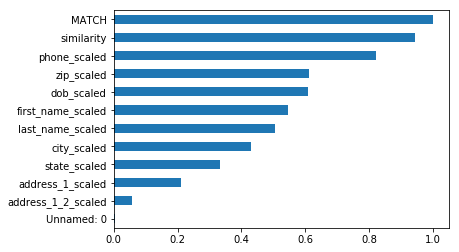

In [24]:
dfFeatures.corr()['MATCH'].sort_values().plot('barh')

In [23]:
pd.crosstab(dfFeatures.MATCH, dfFeatures.phone_scaled, values=dfFeatures.MATCH, aggfunc='count').transpose()

MATCH,0,1
phone_scaled,,
-0.1,7269,37
0.0,25116,130
0.1,43932,181
0.2,43490,158
0.3,26959,84
0.4,9705,26
0.5,2469,5
0.6,659,13
0.7,249,81


In [35]:
pd.crosstab(dfFeatures.MATCH, pd.cut(dfFeatures.similarity, bins=[.1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
            , values=dfFeatures.MATCH, aggfunc='count').transpose()

MATCH,0,1
similarity,,
"(0.1, 0.2]",150867.0,5.0
"(0.2, 0.3]",9499.0,37.0
"(0.3, 0.4]",333.0,316.0
"(0.4, 0.5]",14.0,1458.0
"(0.5, 0.6]",NaN,3215.0
"(0.6, 0.7]",NaN,4235.0
"(0.7, 0.8]",NaN,3540.0
"(0.8, 0.9]",NaN,1775.0
"(0.9, 1]",NaN,392.0


In [36]:
pd.crosstab(dfFeatures.MATCH, dfFeatures.zip_scaled, values=dfFeatures.MATCH, aggfunc='count').transpose()

MATCH,0,1
zip_scaled,,
-0.9,6,1
-0.8,18,1
-0.6,20,2
-0.4,37,2
-0.3,11,2
-0.2,19,2
-0.1,72,7
0.0,33,5
0.1,92,9
